## Load the dataset

In [1]:
# 导入包
from PIL import Image
import torchvision
import natsort
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label
from tqdm import tqdm

In [4]:
# 加载数据   image_list ，mask_list

def get_data(dir_path):
    image_list,mask_list,name_list = [],[],[]
    file_list = os.listdir(dir_path)
    sorted_file_list = natsort.natsorted(file_list)

    for mask_file in sorted_file_list:
        if 'mask' in mask_file:
            image_file = mask_file.split('_mask')[0]+'.png'
            image_path = os.path.join(dir_path, image_file)
            image = Image.open(image_path)
            image = torchvision.transforms.functional.rgb_to_grayscale(image, num_output_channels=1)
            image = np.array(image)
            image_list.append(image)
            
            mask_path = os.path.join(dir_path, mask_file)
            mask = Image.open(mask_path)
            mask = torchvision.transforms.functional.rgb_to_grayscale(mask, num_output_channels=1)
            mask = np.array(mask)
            mask_list.append(mask)
            name_list.append(mask_file)
    return image_list, mask_list,name_list

benign_image, benign_mask, benign_name = get_data(r'./Dataset_BUSI_with_GT/Dataset_BUSI_with_GT/benign')
malignant_image, malignant_mask, malignant_name = get_data(r'./Dataset_BUSI_with_GT/Dataset_BUSI_with_GT/malignant')

print('良性样本个数：',len(benign_image),'\t恶性样本个数：',len(malignant_image))

良性样本个数： 454 	恶性样本个数： 211


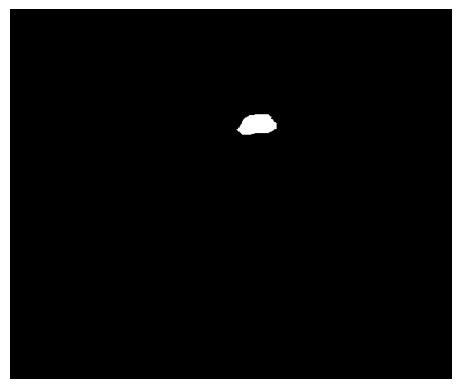

1


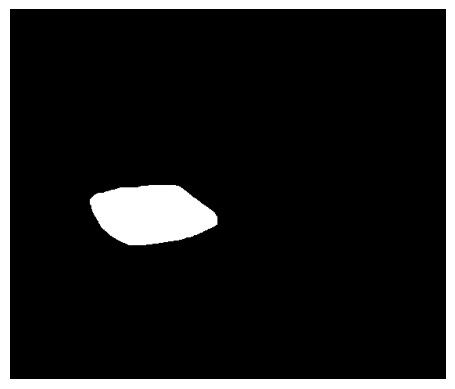

1


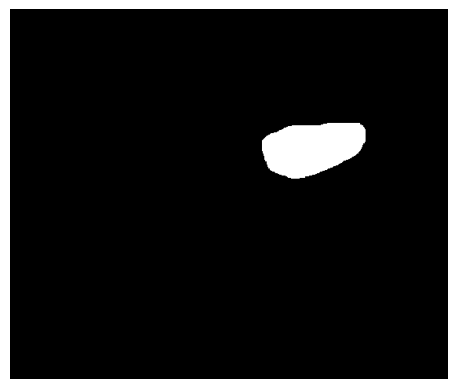

1


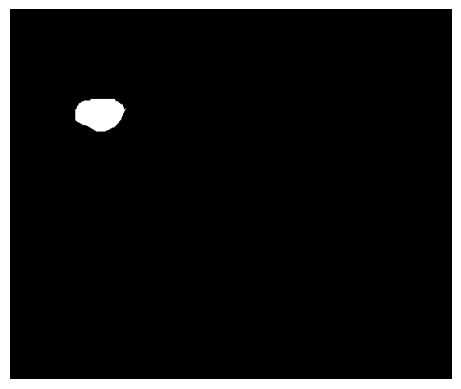

2


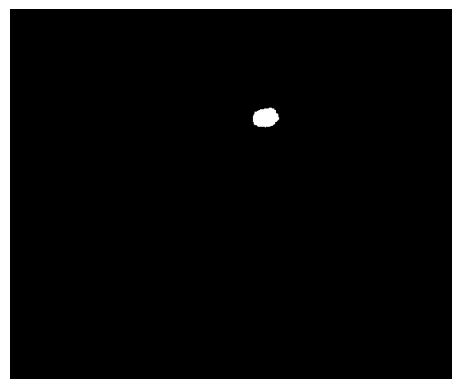

1


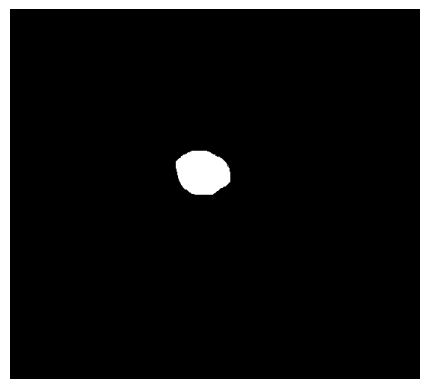

2


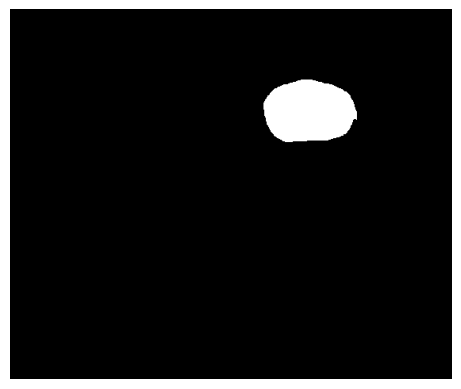

1


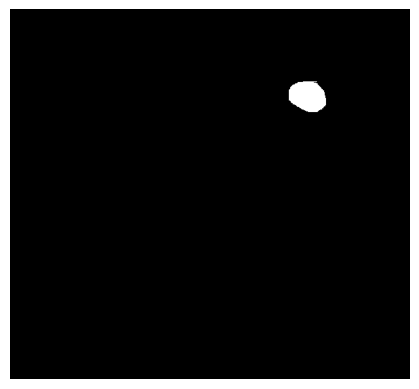

1


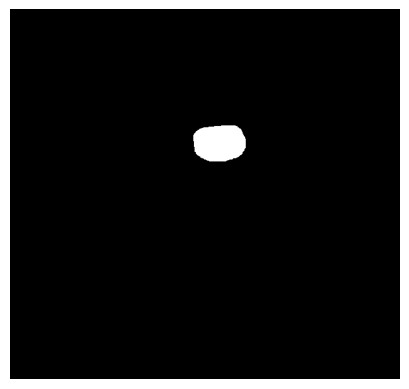

1


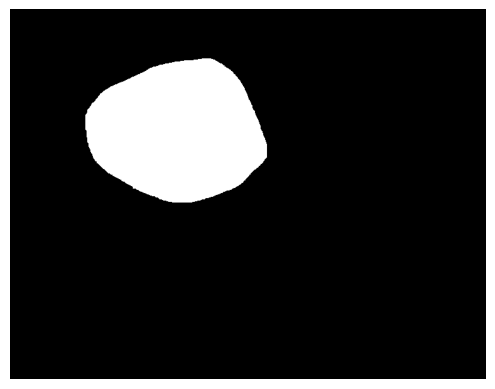

1


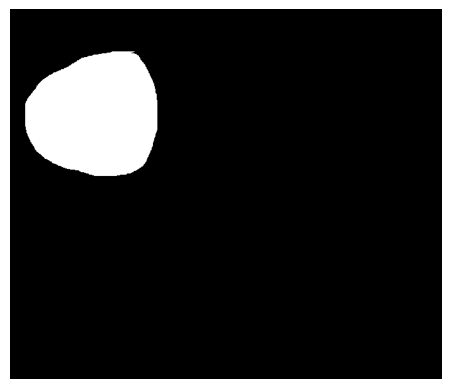

1


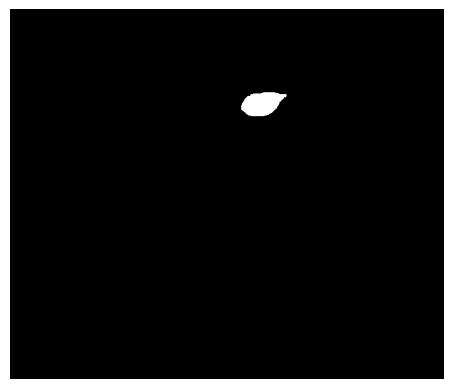

1


In [5]:
for mask in benign_mask[:12]:
    plt.imshow(mask, cmap="gray")
    plt.axis('off')
    plt.show() 
    _, num = label(mask)
    print(num)

In [6]:
# 抽取样本  samlple_list

def extract_samples(image,mask,name,leibie):
    
    labeled_mask, num_regions = label(mask)
    print(num_regions)
    rows, cols = mask.shape

    gap_threshold = 5
    
    min_r = min(coord[0] for coord in zip(*np.nonzero(labeled_mask))) - gap_threshold
    max_r = max(coord[0] for coord in zip(*np.nonzero(labeled_mask))) + gap_threshold
    min_c = min(coord[1] for coord in zip(*np.nonzero(labeled_mask))) - gap_threshold
    max_c = max(coord[1] for coord in zip(*np.nonzero(labeled_mask))) + gap_threshold

    extracted_region = np.zeros((max_r - min_r + 1, max_c - min_c + 1))
    for r, c in zip(*np.nonzero(labeled_mask)):
        extracted_region[r - min_r][c - min_c] = image[r][c]
        
    return ([extracted_region,leibie,' from '+ name])
        

def get_samples(list_image, list_mask, list_name,leibie):
    sample_list = []
    for mask, image, name in tqdm(zip(list_image, list_mask, list_name)):
        sample_list.append(extract_samples(mask, image, name,leibie))
    return sample_list

benign_sample = get_samples(benign_image, benign_mask, benign_name,0)
malignant_sample = get_samples(malignant_image, malignant_mask, malignant_name,1)

9it [00:00, 83.69it/s]

1
1
1
2
1
2
1
1
1
1
1


18it [00:00, 48.28it/s]

1
1
1
1
1
1
1
2
1


30it [00:00, 45.52it/s]

1
1
1
1
1
1
1
1
1
1


35it [00:00, 45.58it/s]

1
1
3
1
1
1
2
1
1
1
1


48it [00:00, 48.14it/s]

1
1
2
1
1
1
1
1
2
1
1
1


59it [00:01, 37.13it/s]

1
1
2
1
1
1
1
1
1
1
1


65it [00:01, 41.04it/s]

1
2
1
1


70it [00:01, 31.77it/s]

1
1
1
1
1
1


78it [00:02, 30.14it/s]

1
1
1
1
1
1
1
1
1


87it [00:02, 34.30it/s]

1
1
1
1
1
1
1


95it [00:02, 35.50it/s]

1
1
3
1
1
1
1
1
1
1


101it [00:02, 41.01it/s]

1
1
2
1
2
3


112it [00:03, 31.90it/s]

1
1
1
1
1
1
1
1
1
1


122it [00:03, 35.56it/s]

1
1
1
1
1
1
1
1


132it [00:03, 39.80it/s]

1
1
1
1
1
1
1
1
1
1


144it [00:03, 44.65it/s]

1
1
1
1
1
1
1
1
1
1
1


149it [00:03, 42.07it/s]

1
1
1
1
1


161it [00:04, 38.44it/s]

1
1
1
2
1
2
1
1
1
1
1
1


166it [00:04, 37.87it/s]

1
1
2
1
1
1
1
1


179it [00:04, 47.57it/s]

1
1
1
1
1
1
1
1
1
1
1
1
1
3


190it [00:04, 45.90it/s]

2
1
1
1
1
1
1
1
1


196it [00:04, 46.44it/s]

2
2
1
1
1
1
1


206it [00:05, 35.52it/s]

1
1
1
3
1
1
1
1


211it [00:05, 29.97it/s]

1
1
1
1
1
1


219it [00:05, 28.38it/s]

1
1
1
1
1
1
1


230it [00:06, 36.80it/s]

1
1
1
1
1
1
1
1
1
1
1


240it [00:06, 42.06it/s]

1
1
1
1
1
2
1
1
1
1
1


245it [00:06, 42.24it/s]

1
1
1
1
1
1


250it [00:06, 31.08it/s]

1
1
1
1
2


259it [00:06, 35.51it/s]

1
1
1
1
1
1
2
1
1
1
1
1
1
1
1


276it [00:07, 49.58it/s]

1
1
1
1
1
1
1
1
1
1
1


289it [00:07, 50.83it/s]

1
2
1
1
1
1
1
1
1
1


295it [00:07, 47.88it/s]

1
1
1
1
1
1
1
1
2
1


308it [00:07, 48.37it/s]

1
1
1
1
1
1
1
1
1
1
1
1


321it [00:08, 55.31it/s]

1
1
1
1
1
1
1
1
1
1
1


327it [00:08, 42.27it/s]

1
1
1
1
1
1
1
1


341it [00:08, 43.56it/s]

1
1
1
1
1
1
1
1
1
1
1


346it [00:08, 40.51it/s]

1
1
1
1
1
1
1
1


355it [00:09, 34.23it/s]

1
1
1
1
1
1


359it [00:09, 29.69it/s]

1
1
2
1
1
1
1
1


369it [00:09, 35.19it/s]

1
1
1
1
1
1
1


379it [00:09, 36.83it/s]

1
1
1
1
1
1
1
1
1
1


384it [00:09, 37.75it/s]

1
1
1
1
3
2


393it [00:10, 30.71it/s]

1
1
1
1
1
1
1


397it [00:10, 32.12it/s]

1
1
1
1
1
1


405it [00:10, 32.33it/s]

1
1
1
1
1
1
1
1
1


413it [00:11, 24.80it/s]

1
1
1
1
1
1


416it [00:11, 18.16it/s]

1
1


419it [00:11, 20.10it/s]

1
1
1


422it [00:11, 14.41it/s]

1
1
1


425it [00:12, 13.65it/s]

1
1
1
1
1


428it [00:12, 12.28it/s]

1
1


430it [00:12, 11.48it/s]

1


436it [00:12, 14.02it/s]

1
1
1
1
1
1
1


443it [00:13, 19.12it/s]

1
1
1
1
1
1
1
1
1


454it [00:13, 33.62it/s]


1
1
1
1
1
1
1


0it [00:00, ?it/s]

3


1it [00:00,  9.21it/s]

1


2it [00:00,  9.02it/s]

1
1
1
1
1
1


8it [00:00, 30.13it/s]

1
1
1
1
1
2


15it [00:00, 38.56it/s]

1
1
1
1
3


19it [00:00, 29.71it/s]

1
1
1
1


23it [00:00, 22.37it/s]

1


26it [00:01, 20.24it/s]

1
1
1
2
1


30it [00:01, 21.10it/s]

1
1


33it [00:01, 16.44it/s]

1
1
1
1
1


39it [00:01, 18.47it/s]

1
1
1
1
1


42it [00:01, 20.28it/s]

1
1
1
1


47it [00:02, 17.96it/s]

1
1
1
1
1
1


55it [00:02, 24.37it/s]

1
1
2
1
1
1


58it [00:02, 21.38it/s]

1
1
1


61it [00:03, 16.53it/s]

1
1
1
1


67it [00:03, 18.98it/s]

1
1
1
1
2


70it [00:03, 19.08it/s]

1
1
1
1


77it [00:03, 18.40it/s]

2
1
1
1
1


80it [00:04, 17.34it/s]

1
1
1
1


83it [00:04, 18.93it/s]

1
1
1
1


88it [00:04, 17.33it/s]

2
1
2
1


92it [00:04, 15.74it/s]

1
1
1
2
1


97it [00:05, 16.28it/s]

1
1
1


102it [00:05, 18.61it/s]

1
1
1
1
1


107it [00:05, 19.69it/s]

1
1
1
1
1


114it [00:05, 24.97it/s]

1
2
1
2
1
3
1


118it [00:05, 27.73it/s]

1
1
1
1
1
1


124it [00:06, 26.29it/s]

1
1
1
1
1
1


127it [00:06, 26.99it/s]

1
1


130it [00:06, 16.71it/s]

1
1
1
1


136it [00:06, 16.99it/s]

1
1
1
1
1


140it [00:07, 20.25it/s]

1
1
1
1
1


146it [00:07, 21.64it/s]

1
1
1
1
1
1
1


150it [00:07, 23.91it/s]

1
1
1


153it [00:07, 17.55it/s]

1
1


158it [00:08, 14.66it/s]

1
1
1
1


160it [00:08, 15.24it/s]

1
1
1


162it [00:08, 13.23it/s]

1
1


164it [00:08,  9.67it/s]

1
1


169it [00:09, 11.41it/s]

1
1
1
1
1


175it [00:09, 16.80it/s]

1
1
1
1
1


181it [00:09, 20.32it/s]

1
1
1
1
1
1


184it [00:10, 18.85it/s]

1
1
1


187it [00:10, 16.43it/s]

1
1
3


189it [00:10, 16.16it/s]

1
1
1
1
1
1
1


198it [00:10, 21.80it/s]

1
1
1
2
1
1


202it [00:10, 21.74it/s]

1
1
1


205it [00:11, 20.32it/s]

1
1
1


208it [00:11, 15.64it/s]

1
1


211it [00:11, 18.08it/s]

2
2


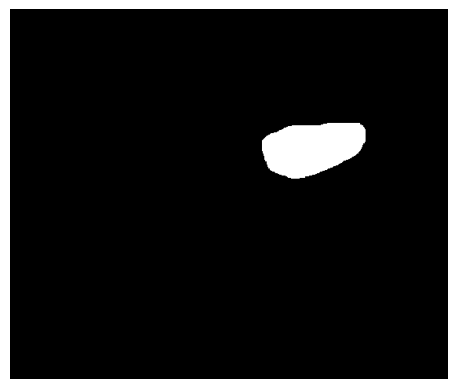

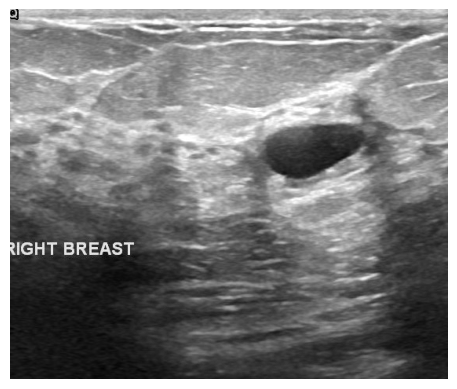

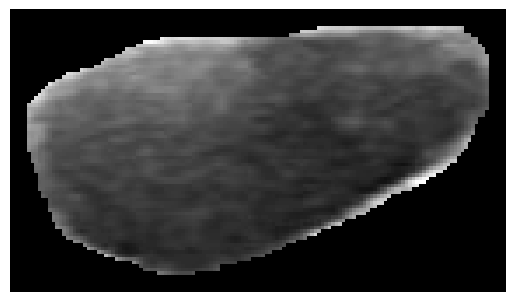

In [7]:
# 样本展示
i =  2

plt.imshow(benign_mask[i] , cmap="gray")
plt.axis('off')
plt.show() 
plt.axis('off')
plt.imshow(benign_image[i] , cmap="gray")
plt.show() 
plt.axis('off')
plt.imshow(benign_sample[i][0], cmap="gray")
plt.show()

In [8]:
for x,_,_ in benign_sample[:10]:
    print(x.shape)

(36, 61)
(87, 173)
(81, 142)
(51, 74)
(35, 43)
(69, 83)
(89, 128)
(58, 68)
(67, 93)
(238, 297)


___

In [68]:
# 创建文件夹
def create_category_folder(category0, category1, source_dir):
    os.makedirs(os.path.abspath(source_dir))
    for new_category in [category0, category1]:
        abspath_dir = os.path.abspath(os.path.join(source_dir,  new_category))
        os.makedirs(abspath_dir)

dataset_dir = r"./Dataset_BUSI_with_GT/Dataset_BUSI_with_GT/sample"
create_category_folder('benign', 'malignant', dataset_dir)

In [69]:
# 保存样本
def save_samples(sample_list, dataset_dir):
    for i,(sample, label, name) in enumerate(sample_list):
        category_dir = 'malignant' if label else 'benign'
        sample = Image.fromarray(np.uint8(sample))
        sample.save(os.path.join(dataset_dir,  category_dir, str(i)+name))
save_samples(benign_sample, dataset_dir)
save_samples(malignant_sample, dataset_dir)